In [1]:
%matplotlib inline
import seaborn
import numpy as np
import scipy as sp
import scipy.io
import scipy.signal
import matplotlib.pyplot as plt

In [6]:
data = sp.io.loadmat('../data/pipeline-20s-eyesc/oaExclFiltCARClust-mat/120127109.mat')
srate = data['srate'][0][0]
data  = data['data']

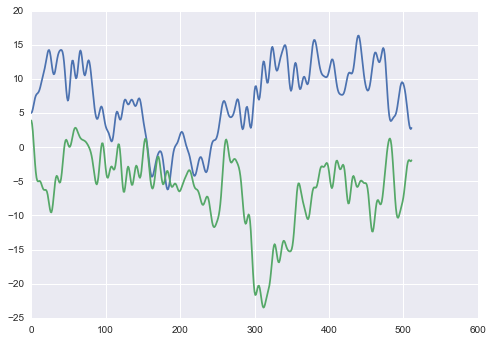

In [34]:
sig1 = data[0][1024:1536]
sig2 = data[0][2048:2560]
sig3 = data[0][3072:3584]
sig4 = data[0][4096:4608]
plt.plot(sig1)
plt.plot(sig2)

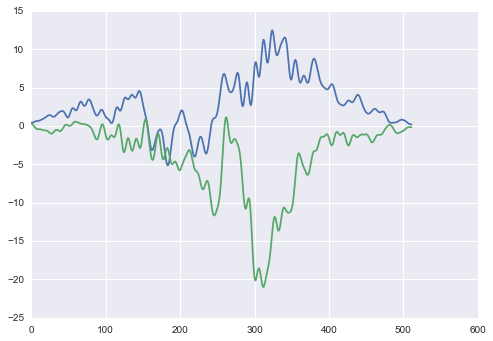

In [14]:
w = sp.signal.hamming(len(sig1))
plt.plot(sig1 * w)
plt.plot(sig2 * w)

(0, 55)

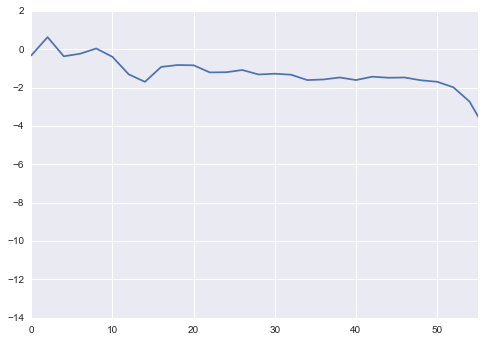

In [27]:
f, psd = sp.signal.welch(sig1, srate)
plt.plot(f, np.log10(psd)); plt.xlim([0, 55])

(0, 55)

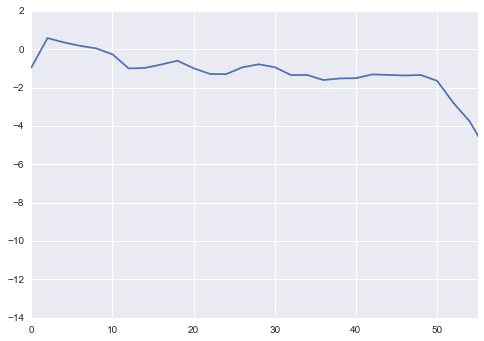

In [28]:
f, psd = sp.signal.welch(sig2, srate)
plt.plot(f, np.log10(psd)); plt.xlim([0, 55])

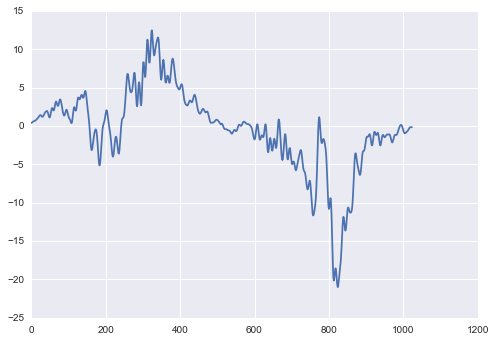

In [30]:
stitched = np.concatenate([sig1*w, sig2*w])
plt.plot(stitched)

(0, 55)

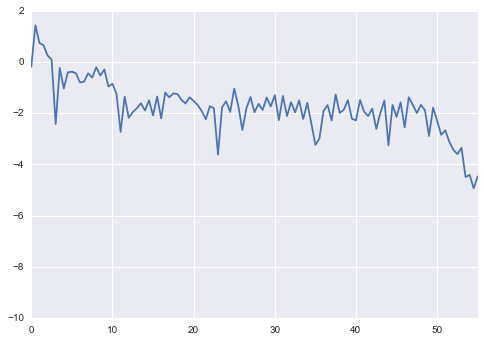

In [48]:
f, psd = sp.signal.welch(stitched, srate, nperseg=srate*2, noverlap=srate, window='hamming')
plt.plot(f, np.log10(psd)); plt.xlim([0, 55])

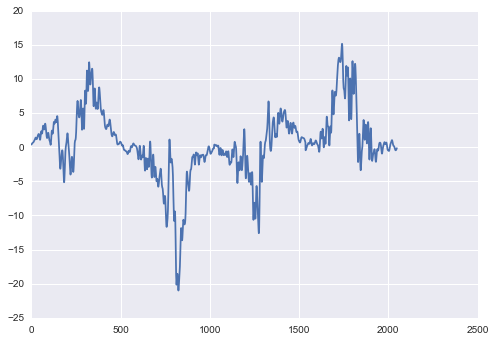

In [35]:
full_stitched = np.concatenate([stitched, sig3*w, sig4*w])
plt.plot(full_stitched)

(0, 55)

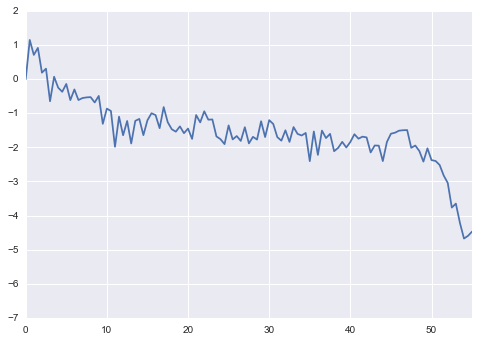

In [47]:
f, psd = sp.signal.welch(full_stitched, srate, nperseg=srate*2, noverlap=srate, window='hamming')
plt.plot(f, np.log10(psd)); plt.xlim([0, 55])

(0, 55)

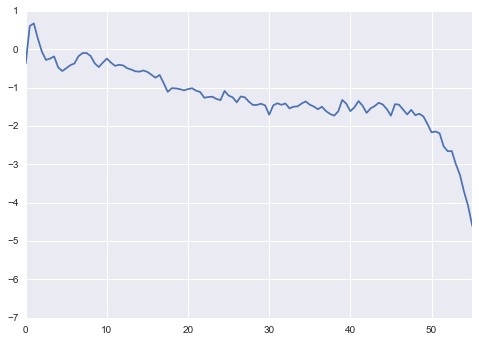

In [46]:
f, psd = sp.signal.welch(data[-1], srate, nperseg=srate*2, noverlap=srate, window='hamming')
plt.plot(f, np.log10(psd)); plt.xlim([0, 55])